In [12]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import glob
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go

import gzip

import h5py
import scanpy as sc
import scipy
import mira
import torch
import matplotlib.colors as mcolors
from scipy import stats
import logging
import warnings
import openpyxl
warnings.simplefilter("ignore")
mira.utils.pretty_sderr()

In [33]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
sc.set_figure_params(scanpy=True, fontsize=20, dpi_save = 350)
sns.set(rc={'figure.figsize':(8,8)})
logging.getLogger("fontTools.subset").setLevel(logging.WARNING)

In [2]:
adata_gene = sc.read_h5ad('/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/h5_files/donor1_multiome_gex_post_mira.h5ad')

In [3]:
adata_gene

AnnData object with n_obs × n_vars = 32418 × 23090
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden', 'leiden_filtered_cells', 'sample', 'cell_type_annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_type_major_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'sample_colors', 'topic_dendogram', 'umap'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'topic_feature_activations', '

In [4]:
adata_gene = adata_gene[adata_gene.obs["leiden_filtered_cells"] == True].copy()

<Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>

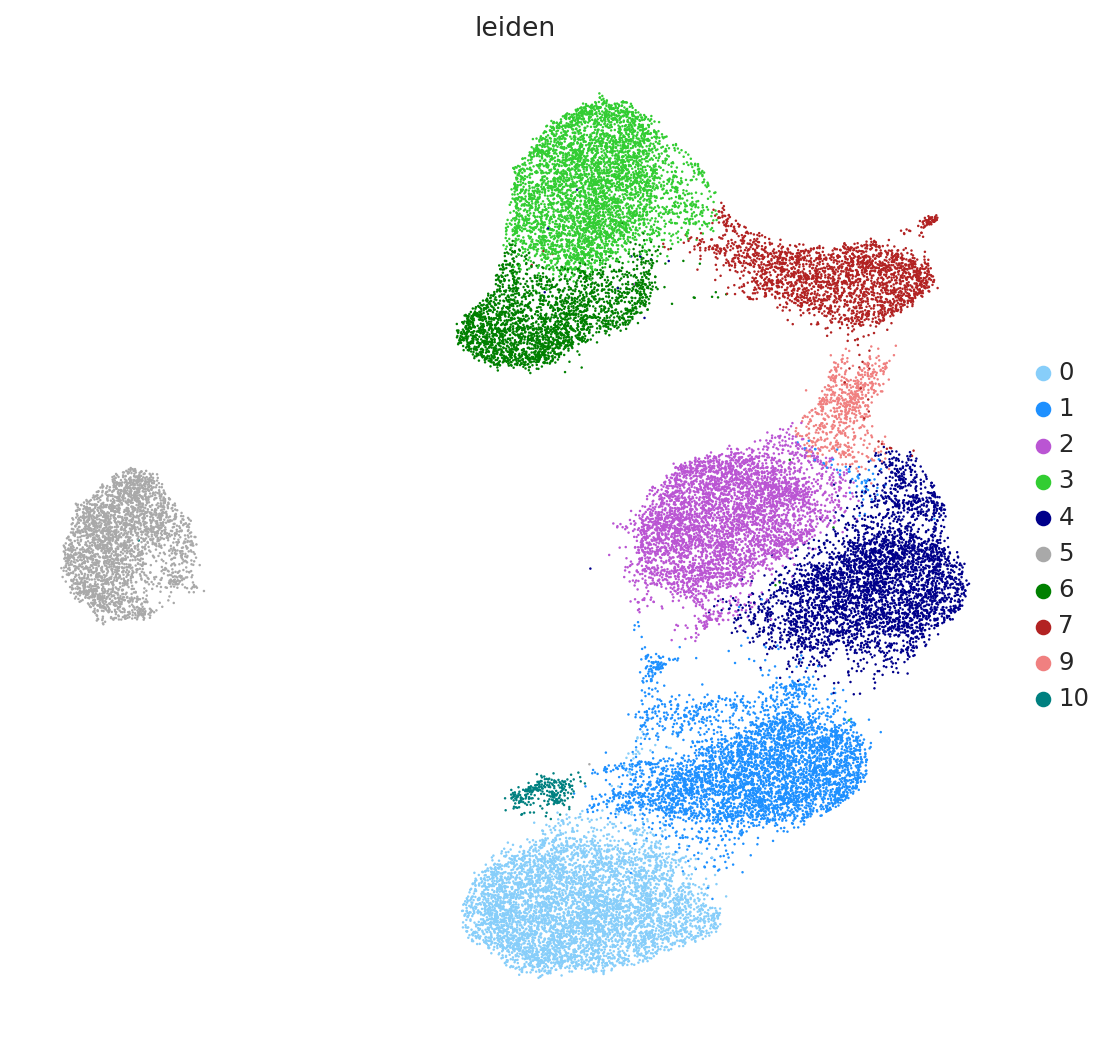

In [7]:
sc.pl.umap(adata_gene, 
           color=['leiden'],
           frameon = False,
           show = False,
           s = 5
          )

# transfer human tonsil atlas SVM cell type prediction probabilities

In [25]:
adata_tonsil_class = sc.read_h5ad('/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/h5_files/donor1_scimilarity.h5ad')
adata_tonsil_class

AnnData object with n_obs × n_vars = 31314 × 1842
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden', 'score_G1S', 'score_G2M', 'score_myc_up', 'score_GC', 'score_PB', 'score_MBC_1', 'score_MBC_2', 'score_preGC', 'score_LZ_GC', 'score_DZ_GC', 'DNA_damage', 'LZ_vs_DZ_down', 'LZ_vs_DZ_up', 'Ag_presentation', 'BCR_signaling', 'topic7_peak_genes', 'isre_topic7_go0050776', 'ap1_topic11_GO_0002757', 'ets_topic15_GO_0022407', 'isre_topic7_great', 'ap1_topic11_great', 'ets_topic15_great', 'irf4_prdm1_upDEG', 'irf4_spib_upDEG', 'irf4_batf_upDEG', 'irf4_prdm1_

In [26]:
if 'adata_gene' in locals() and 'adata_tonsil_class' in locals():
    # Ensure both have the same index type
    adata_tonsil_class.obs.index = adata_tonsil_class.obs.index.astype(str)
    adata_gene.obs.index = adata_gene.obs.index.astype(str)

    # Select columns to copy
    columns_to_copy = ['Scim', 'predicted_labels', 'prob_Activated NBC', 'prob_GCBC', 'prob_MBC', 'prob_NBC', 'prob_PC']

    # Perform the merge based on index
    adata_gene.obs = adata_gene.obs.merge(
        adata_tonsil_class.obs[columns_to_copy], 
        left_index=True, 
        right_index=True, 
        how='left'
    )

else:
    print("❌ Error: `adata` and/or `adata_steve` are not defined. Please load them before running the code.")

In [27]:
adata_gene

AnnData object with n_obs × n_vars = 31314 × 23090
    obs: 'cell_type_major', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'topic_22', 'topic_23', 'topic_24', 'topic_25', 'topic_26', 'topic_27', 'topic_28', 'topic_29', 'topic_30', 'topic_31', 'leiden', 'leiden_filtered_cells', 'sample', 'cell_type_annotation', 'score_total_GC', 'score_PB', 'score_LZ_GC', 'score_DZ_GC', 'score_G1S', 'score_G2M', 'score_myc_up', 'DNA_damage', 'Ag_presentation', 'BCR_signaling', 'Scim', 'predicted_labels', 'prob_Activated NBC', 'prob_GCBC', 'prob_MBC', 'prob_NBC', 'prob_PC'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    

# gene scores

In [9]:
gene_set_dir = "/media/RAIDArray/Nick/gene_sets/"

In [13]:
df_temp=pd.read_excel(f'{gene_set_dir}dna_damage_response_go.xlsx')
list_dna_damage= df_temp['Symbol'].unique().tolist()
list_dna_damage = [word.upper() for word in list_dna_damage]

In [14]:
df_temp=pd.read_excel(f'{gene_set_dir}GO0019882_antigen_processing_presentation.xlsx')
list_ag_presentation= df_temp['Symbol'].unique().tolist()
list_ag_presentation = [word.upper() for word in list_ag_presentation]

df_temp=pd.read_excel(f'{gene_set_dir}GO0050853_b_cell_receptor_signaling_GO.xlsx')
list_bcr_signaling= df_temp['Symbol'].unique().tolist()
list_bcr_signaling = [word.upper() for word in list_bcr_signaling]

In [15]:
df_temp=pd.read_excel(f'{gene_set_dir}PB marker gene King et al 2021.xlsx')
list_PB= df_temp['gene'].unique().tolist()

df_temp=pd.read_excel(f'{gene_set_dir}LZ GC markers.xlsx')
list_LZ_GC= df_temp['Unnamed: 6'].unique().tolist()

df_temp=pd.read_excel(f'{gene_set_dir}DZ GC markers.xlsx')
list_DZ_GC= df_temp['gene'].unique().tolist()

list_total_GC = list_LZ_GC+list_DZ_GC

In [16]:
list_g1s=['CDCA7','MCM4','MCM2','RFC2','UNG','MCM6','RRM1','SLBP','PCNA','ATAD2','TIPIN','MCM5','UHRF1','RPA2','DTL','PRIM1','FEN1','HELLS','GMNN','POLD3','NASP','CHAF1B','GINS2','POLA1','MSH2','CASP8AP2','CDC6','UBR7','CCNE2','WDR76','TYMS','CDC45','CLSPN','RRM2','DSCC1','RAD51','USP1','EXO1','BLM','RAD51AP1','CENPU','E2F8','BRIP1']
list_g2m=['CBX5','AURKB','CKS1B','CKS2','JPT1','HMGB2','ANP32E','LBR','TMPO','TOP2A','TACC3','TUBB4B','NCAPD2','RANGAP1','CDK1','SMC4','KIF20B','CDCA8','CKAP2','NDC80','DLGAP5','HJURP','CKAP5','BUB1','CKAP2L','ECT2','KIF11','BIRC5','CDCA2','NUF2','CDCA3','NUSAP1','TTK','AURKA','MKI67','PIMREG','CCNB2','TPX2','ANLN','KIF2C','CENPE','GTSE1','KIF23','CDC20','UBE2C','CENPF','CENPA','HMMR','CTCF','PSRC1','CDC25C','NEK2','GAS2L3','G2E3']
list_myc_up=['NARS','NUFIP1','NUP43','SLC19A1','NCL','EXOSC7','SURF2','PSMG1','METTL1','AEN','1110004E09RIK','LYAR','PSME3','TSR1','SHMT1','BCAT1','CCND2','NDUFAF4','SLC40A1','HEATR3','AIMP2','TTC27','FAM136A','VCAM1','CCND2','NOP56','C1QA','MKI67IP','AIMP2','PLSCR1','RRP1B','MFSD2A','CIRH1A','C1QB','MRTO4','CCND2','WDR75','HSP90AA1','GCSH','FAM195A','TIMM10','FABP5','SRM','C1QC','2610528E23RIK','LOC100047619','CCND2','SAA3','UTP15','ATIC','SHMT1','THYN1','2700023E23RIK','DDX18','IL1R2','TIMM9','CSDA','RCL1','GRWD1','NOLC1','GM12816','RPF2','1810029B16RIK','GSTT1','TSR1','TOMM5','CCT6A','NHP2','CHCHD4','MOGS','IRF4','FSCN1','GM7901','SLC19A1','PLSCR1','PA2G4','HSPD1','LOC100047009','EBNA1BP2','PHB','MATR3','GAR1','RCC1','NOP58','SLC19A1','GNL3','TSEN2','NDUFAF4','EMR4','GSTT2','SLPI','ABCG2','NOP16','PPP1R14B','LAP3','PRDX6','SHMT2','PPP1R14B','GM14005','NOLC1','LPL','MATR3','WDR12','BATF','C1QBP','---','1110004E09RIK','CCND2','UCK2','SPIRE1','LOC100048307','HTRA2','DDX18','PSMD7','TUBA4A','2610201A13RIK','CCND2','NOC4L','RPP40','ASNS','LYZ1','RANGRF','SUB1','ENDOG','DCTD','BSN','RSL1D1','NT5DC2','NHP2','2010204K13RIK','FAM185A','PECR','UCK2','SOCS3','ACY1','ZMYND19','SOCS3','PRMT1','SMYD2','FABP5','FBL','GRWD1','DDT','PNO1','CCND2','PA2G4','GRWD1','APRT','HK2','CCDC86','ECE2','APEX1','SOCS2','ZNHIT6','ATAD3A','HSPA9','TIMD2','PPA1','MIF','CTPS','APEX1','MRPS18B','IL10','METTL1','TUBA4A','NCL','NOP16','MRPS6','HSP90B1','TCFAP4','EIF2B3','SHMT1','RANBP1','ASNS','GSR','NOC4L','DCTPP1','LOC639633','2610019E17RIK','UCK2','ADM','TMEM158','CD70','POLR1B','MYC','C1QBP','PPAT','PYCR1','SPR']

In [17]:
sc.tl.score_genes(adata_gene, 
                   list_total_GC, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='score_total_GC', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)

sc.tl.score_genes(adata_gene, 
                   list_PB, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='score_PB', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)

sc.tl.score_genes(adata_gene, 
                   list_LZ_GC, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='score_LZ_GC', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)

sc.tl.score_genes(adata_gene, 
                   list_DZ_GC, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='score_DZ_GC', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)


       'RAB30-AS1', 'MGEA5'],
      dtype='object')
       'IGHA'],
      dtype='object')


In [18]:
sc.tl.score_genes(adata_gene, 
                   list_g1s, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='score_G1S', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)


sc.tl.score_genes(adata_gene, 
                   list_g2m, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='score_G2M', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)


sc.tl.score_genes(adata_gene, 
                   list_myc_up, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='score_myc_up', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)


sc.tl.score_genes(adata_gene, 
                   list_dna_damage, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='DNA_damage', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)


sc.tl.score_genes(adata_gene, 
                   list_ag_presentation, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='Ag_presentation', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)


sc.tl.score_genes(adata_gene, 
                   list_bcr_signaling, 
                   ctrl_size=300, 
                   gene_pool=None, 
                   n_bins=25, 
                   score_name='BCR_signaling', 
                   random_state=6, 
                   copy=False, 
                   use_raw=False)



       'C1QB', 'FAM195A', 'C1QC', '2610528E23RIK', 'LOC100047619', 'SAA3',
       '2700023E23RIK', 'CSDA', 'GM12816', '1810029B16RIK', 'GSTT1', 'GM7901',
       'LOC100047009', 'EMR4', 'GSTT2', 'SLPI', 'GM14005', '---',
       'LOC100048307', '2610201A13RIK', 'LYZ1', '2010204K13RIK', 'ECE2',
       'TIMD2', 'CTPS', 'TCFAP4', 'LOC639633', '2610019E17RIK', 'TMEM158'],
      dtype='object')
       'BCL2A1C', 'BCL2A1D', 'BMYC', 'BOD1L', 'BRCC3DC', 'BRME1', 'CDC5LRT1',
       'CDC5LRT4', 'CDC5LRT5', 'CDC5LRT6', 'CDC5LRT7', 'CDC5LRT8', 'CDC5LRT9',
       'CDC5LRT10', 'CHRNA4', 'CXCL12', 'D7ERTD443E', 'EPHA2', 'FGF10', 'FH1',
       'FIRRM', 'GGN', 'H2AC25', 'H2AX', 'HMGA1B', 'HROB', 'IFI204', 'KASH5',
       'KHDC3', 'MACROH2A1', 'MAPK15', 'MARCHF7', 'MILL1', 'MORC2A', 'MORC2B',
       'MRE11A', 'NSCME3L', 'NUAK1', 'NUPR2', 'PAGR1A', 'PIERCE1', 'PLK5',
       'POT1A', 'POT1B', 'PPP4R3C1', 'PPP4R3C2', 'PRAP1', 'PRDM9', 'PTPRV',
       'RAD21L', 'RBM24', 'RBX1-PS', 'RNF138RT1', 'SNAI2', 'SPO11

# Figure 2 umaps

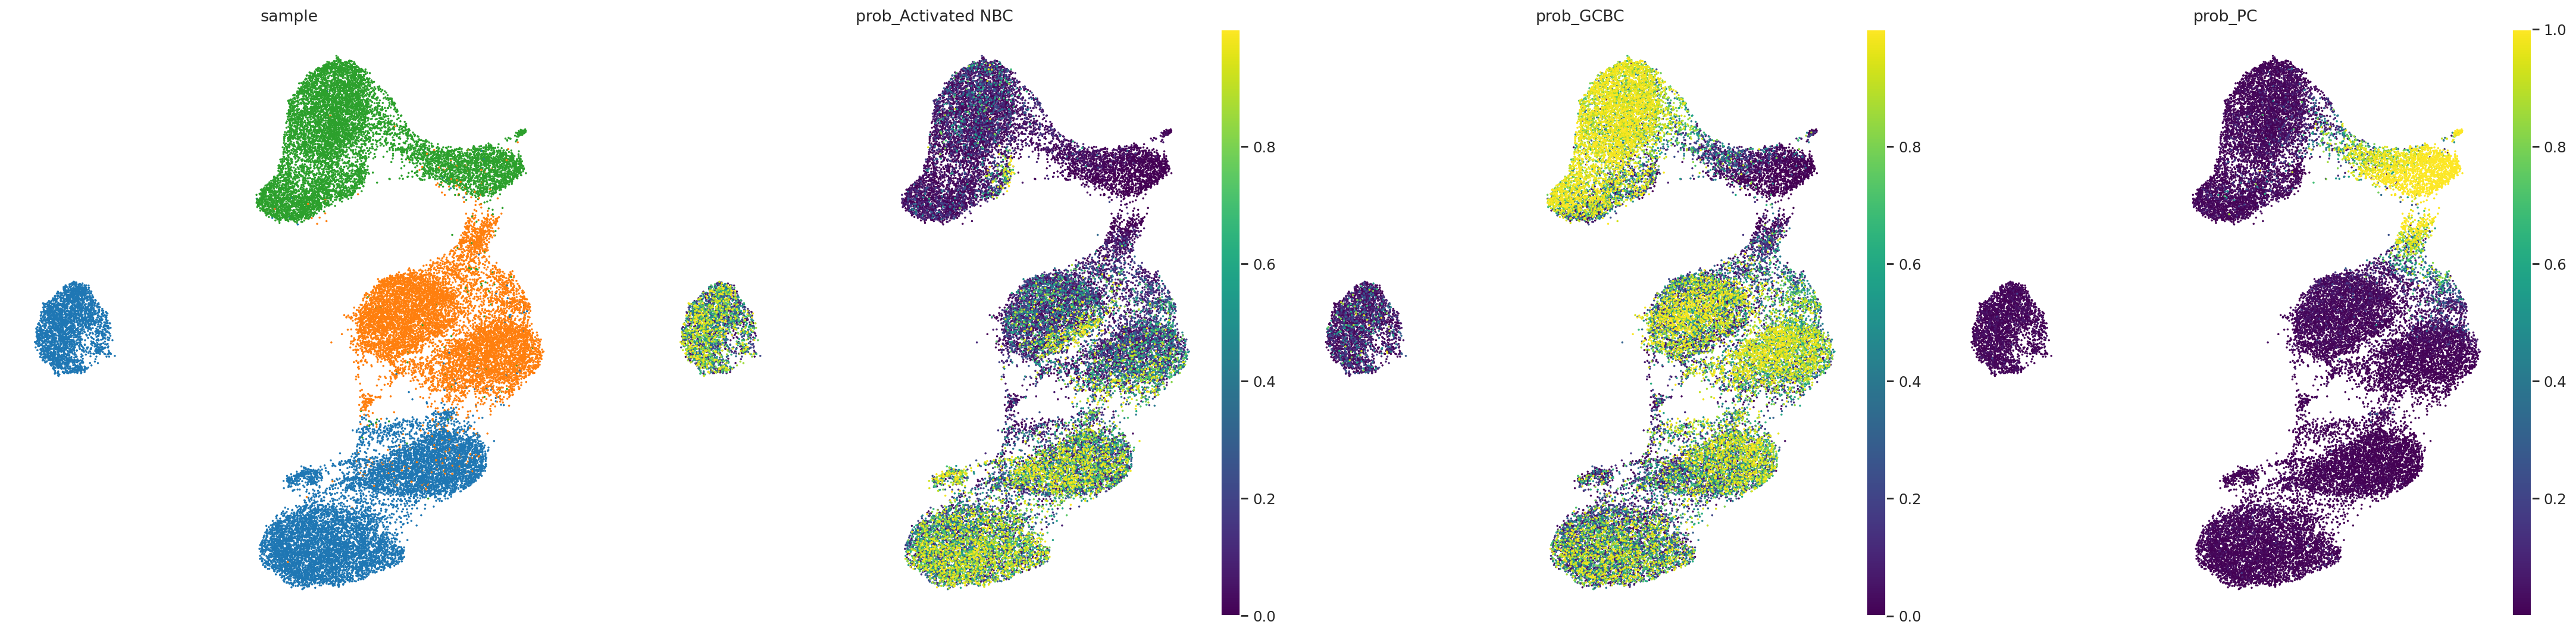

In [34]:
gene_set = ['sample', 'prob_Activated NBC', 'prob_GCBC', 'prob_PC']

sc.pl.umap(adata_gene, 
           color=gene_set,
           color_map='viridis',
           frameon = False,
           legend_loc=None,
           show = False,
           ncols=4,
           wspace=0.05,
           s = 10
          )

plt.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/plots/tonsil_svm_classifications.pdf")

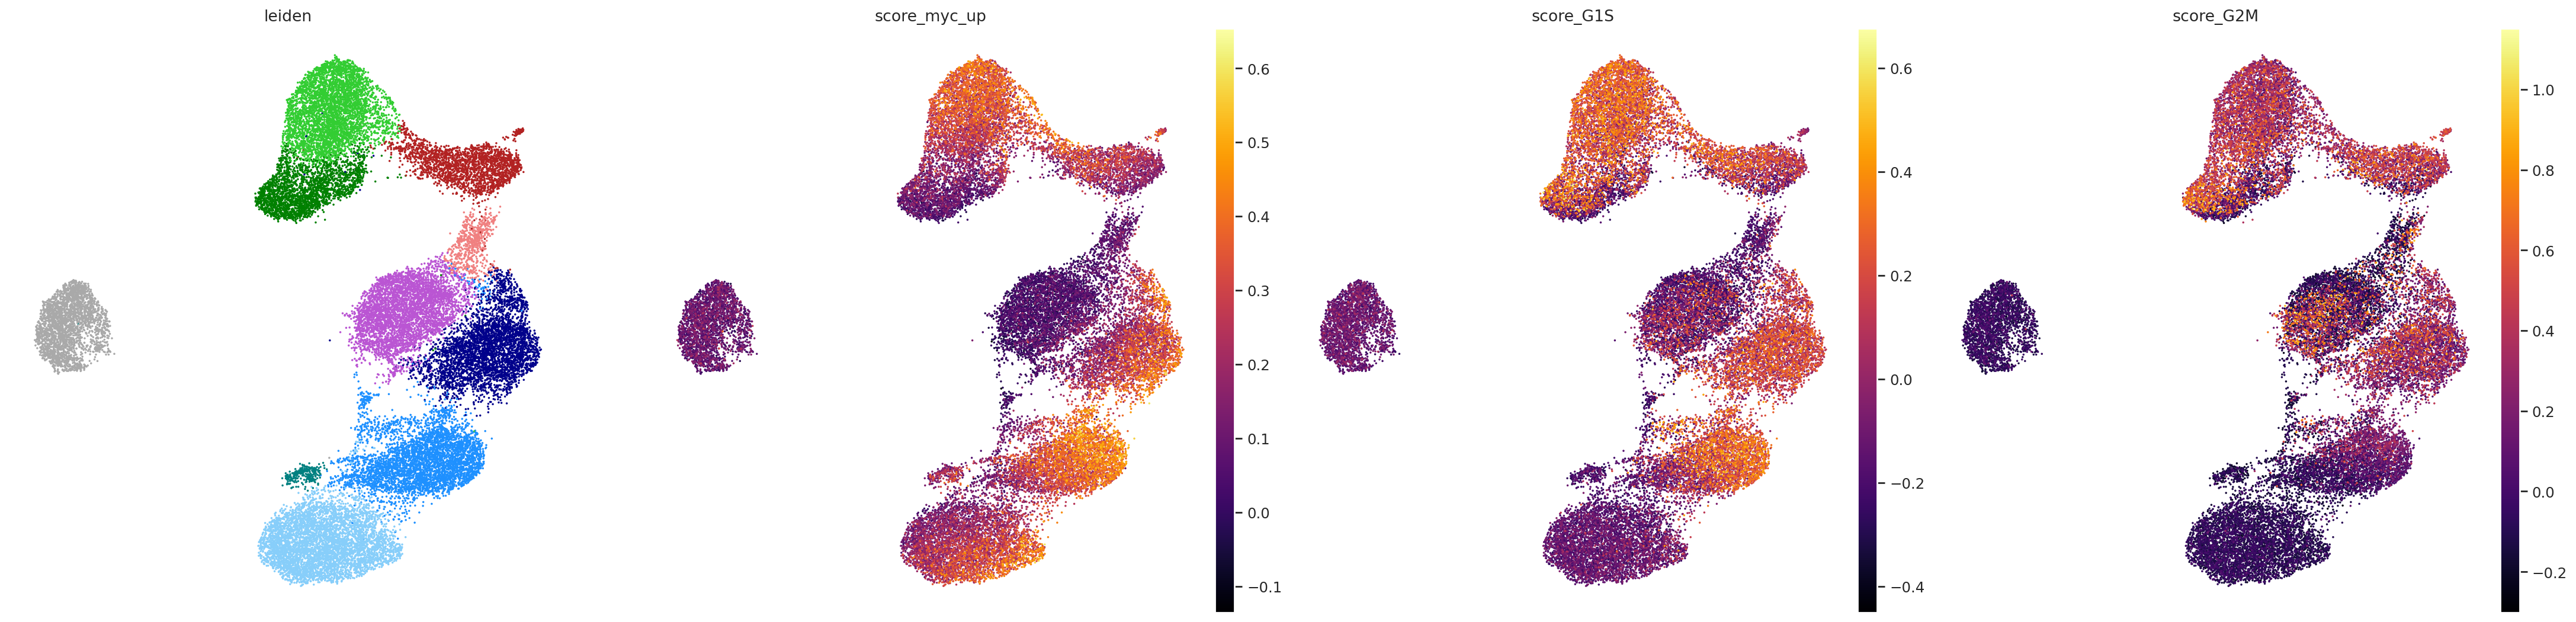

In [35]:
gene_set = ['leiden', 'score_myc_up','score_G1S', 'score_G2M']

sc.pl.umap(adata_gene, 
           color=gene_set,
           color_map='inferno',
           frameon = False,
           legend_loc=None,
           show = False,
           ncols=4,
           wspace=0.05,
           s = 10
          )

plt.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/plots/cell_cycle_gene_scores.pdf")

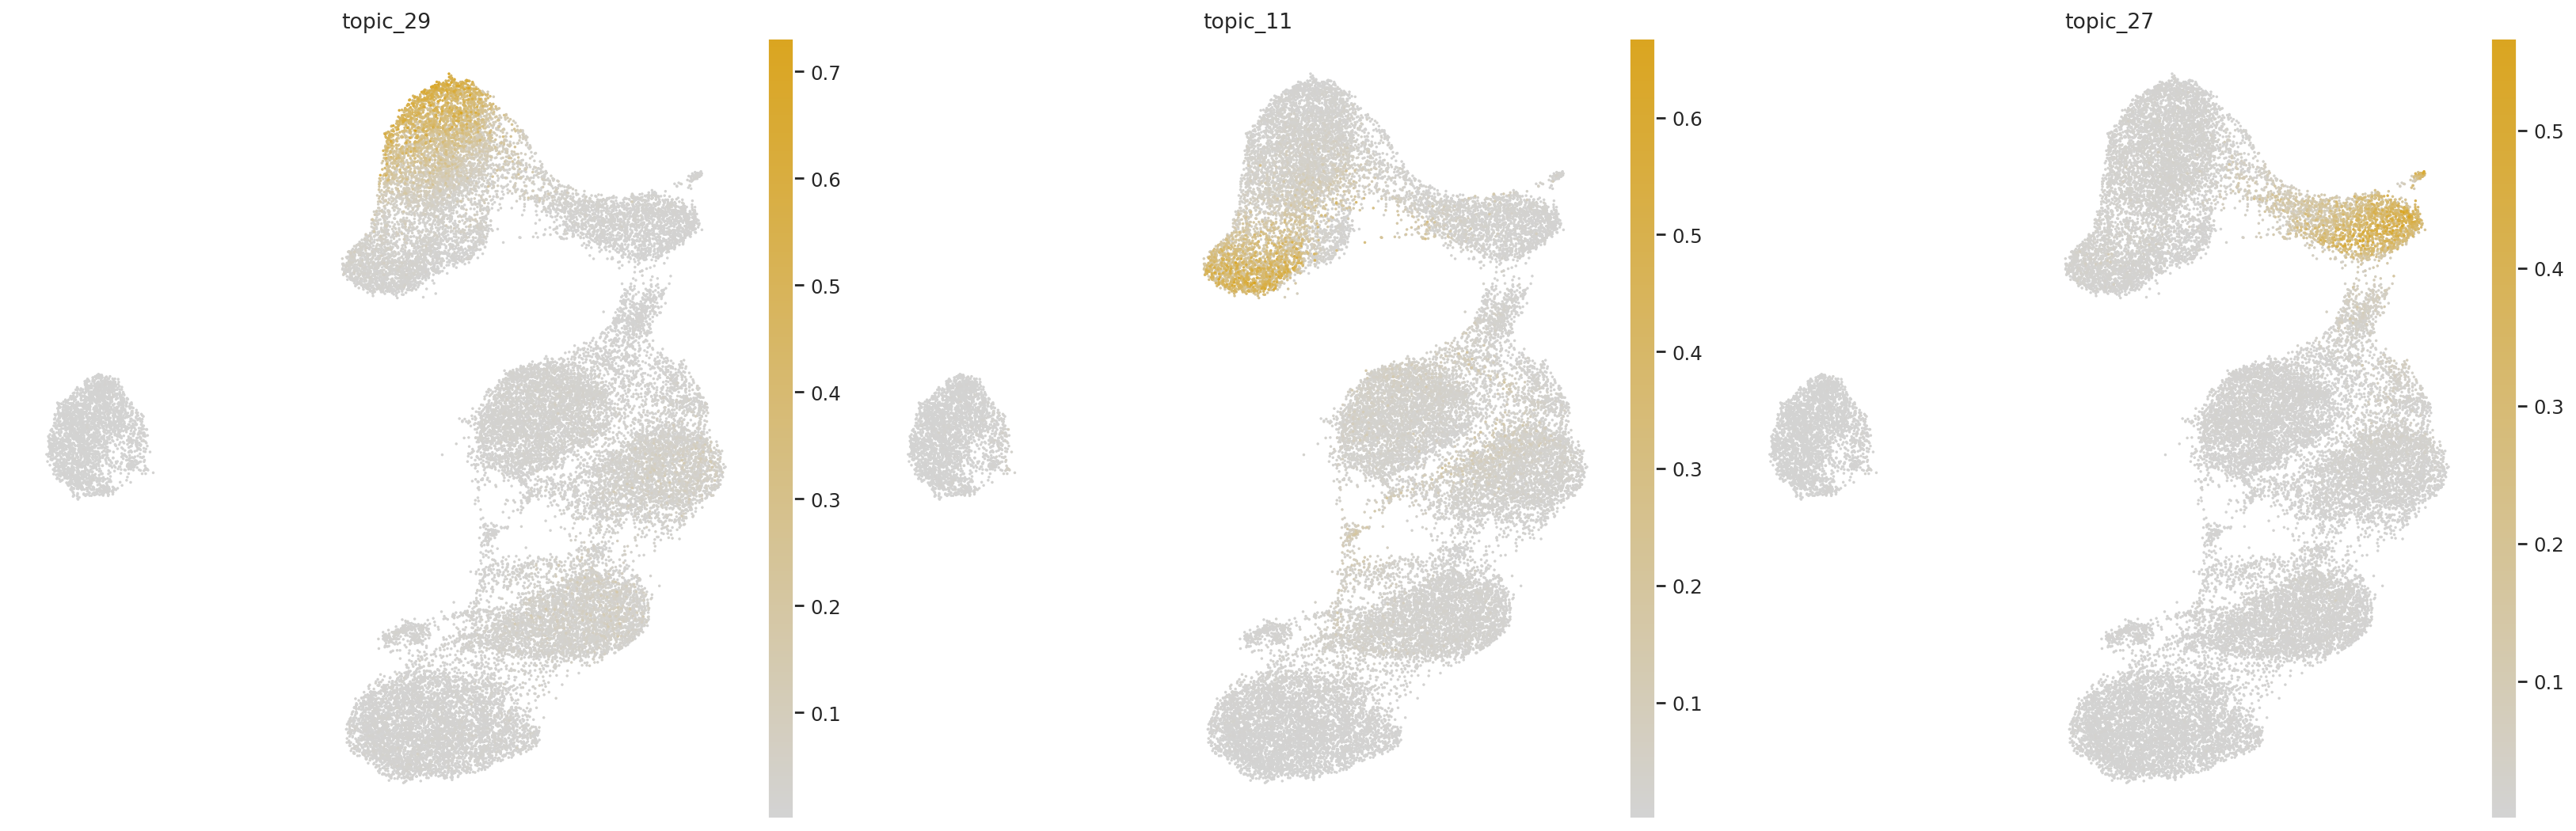

In [38]:
gene_set = ['topic_29', 'topic_11','topic_27']

custom_cmap = mcolors.LinearSegmentedColormap.from_list("lightgray_goldenrod", ["lightgray", "goldenrod"])

sc.pl.umap(adata_gene, 
           color=gene_set,
           color_map=custom_cmap,
           frameon = False,
           legend_loc=None,
           show = False,
           ncols=4,
           wspace=0.05,
           s = 10
          )

plt.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/plots/gene_topics.pdf")

# ATAC

In [39]:
adata_atac = sc.read_h5ad('/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/h5_files/donor1_multiome_atac_post_mira.h5ad')
adata_atac

AnnData object with n_obs × n_vars = 32418 × 191255
    obs: 'cell_type_major', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10', 'topic_11', 'topic_12', 'topic_13', 'topic_14', 'topic_15', 'topic_16', 'topic_17', 'topic_18', 'topic_19', 'topic_20', 'topic_21', 'cell_index', 'sample', 'leiden', 'cell_type_annotation', 'leiden_filtered_cells'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'leiden_colors', 'sample_colors', 'topic_dendogram'
    obsm: 'X_joint_umap_features', 'X_topic_compositions', 'X_umap', 'X_umap_features'
    varm: 'topic_feature_activations', 'topic_feature_compositions'
    layers: 'counts'

In [40]:
adata_atac = adata_atac[adata_atac.obs["leiden_filtered_cells"] == True].copy()

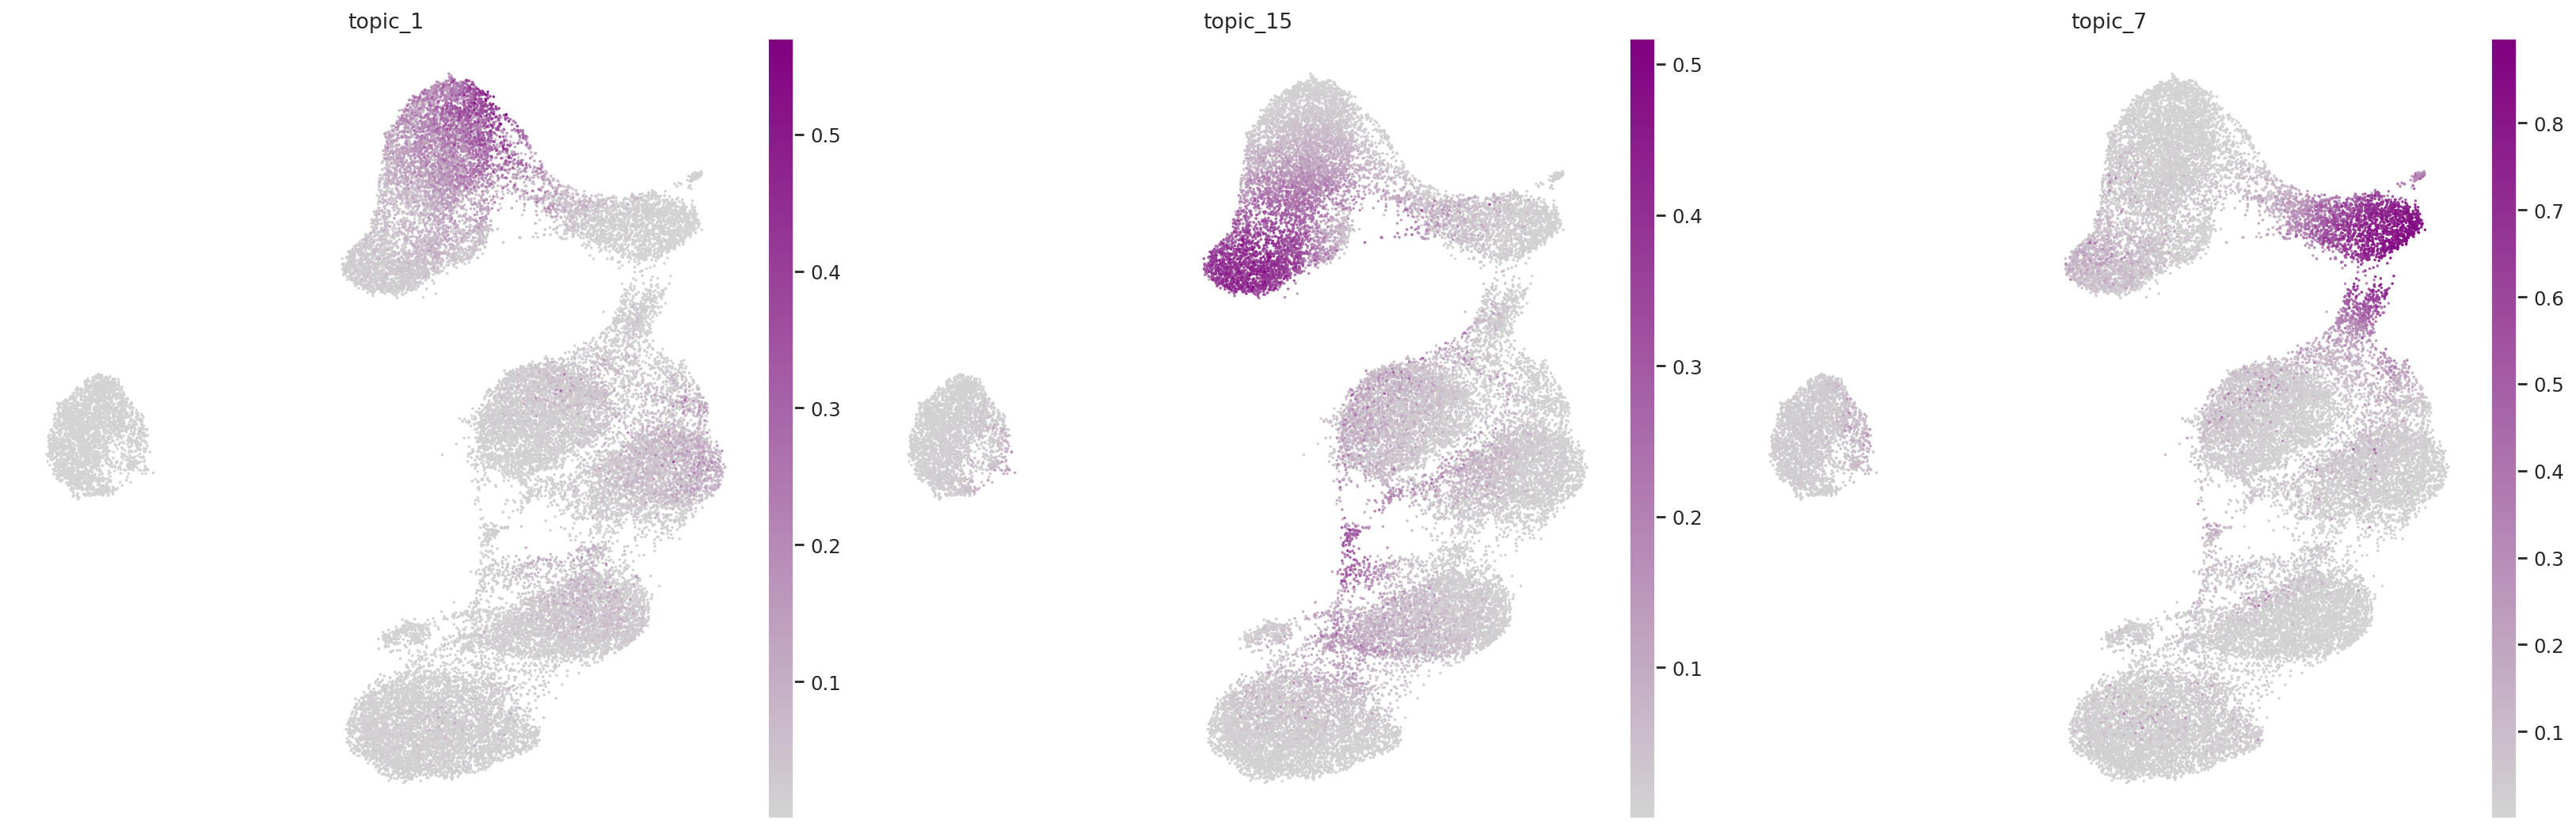

In [42]:
gene_set = ['topic_1', 'topic_15','topic_7']

custom_cmap = mcolors.LinearSegmentedColormap.from_list("lightgray_purple", ["lightgray", "purple"])

sc.pl.umap(adata_atac, 
           color=gene_set,
           color_map=custom_cmap,
           frameon = False,
           legend_loc=None,
           show = False,
           ncols=4,
           wspace=0.05,
           s = 10
          )

plt.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/plots/atac_topics.pdf")

# Figure S7A pseudotime analsyis

In [61]:
# umap_kwargs = dict(
#     add_outline=False, outline_width=(0.1,0), outline_color=('grey', 'white'),
#     legend_fontweight=550, frameon = False, legend_fontsize=12
# )

In [43]:
# import pseudotime values from STREAM analysis
stream_xdr = pd.read_csv("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/tables/stream_xdr.csv")
stream_xdr.head()

Unnamed: 0         x         y  leiden  S2_pseudotime
0  AAACAGCCAAGCCACT-3  0.006317  0.009356       3       0.025087
1  AAACAGCCAAGGTGCA-1 -0.004346 -0.000036       1       0.005043
2  AAACAGCCAAGTTATC-1 -0.005226 -0.000034       0       0.004166
3  AAACAGCCAATAGCCC-1 -0.007993  0.000281       0       0.001382
4  AAACAGCCAGTTAGCC-1 -0.007842  0.000280       0       0.001533

In [44]:
stream_xdr.set_index(stream_xdr.columns[0], inplace=True)

In [45]:
adata_gene.obs['stream_pseudotime'] = adata_gene.obs.index.map(stream_xdr['S2_pseudotime'])

In [46]:
adata_gene.obs['leiden'].unique()

['5', '3', '1', '0', '6', '2', '7', '4', '9', '10']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '9', '10']

In [58]:
adata_gene.obs['leiden_original'] = adata_gene.obs['leiden']
rename_mapping = {
    '0': 'ActB-1',
    '1': 'ActB-2',
    '2': 'ActB-4',
    '3': 'GC-1',
    '4': 'ActB-3',
    '5': 'Naive',
    '6': 'GC-2',
    '7': 'PB-1',
    '9': 'earlyPB',
    '10': 'earlyActB-1'
}

adata_gene.obs['leiden'] = adata_gene.obs['leiden'].cat.rename_categories(rename_mapping)

In [59]:
###version3 - order by cluster first and label shaded boxes#####
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import matplotlib.cm as cm
from itertools import cycle



def plot_genescore_pseudotime_with_cluster_labels(
    adata, leiden_categories, y_columns_per_plot, color_dict, bin_size=2500, linewidth=2, cluster_order=None
):
    """
    Plots multiple line graphs of running averages for groups of y_columns vs Leiden cluster order and pseudotime rank order,
    with shaded backgrounds for clusters and Leiden cluster labels below the bottom plot.

    Parameters:
        adata (AnnData): An AnnData object with obs and gene expression data.
        leiden_categories (list): A list of Leiden categories to filter the data.
        y_columns_per_plot (list of lists): A list where each element is a list of y_columns to overlay in one plot.
        color_dict (dict): A dictionary mapping each y_column to a specific color.
        bin_size (int): The number of cells per running average bin.
        linewidth (int): Line width for the plots.
        cluster_order (list, optional): A list specifying the order of clusters on the x-axis.

    Returns:
        matplotlib.figure.Figure: The figure object for the generated plots.
    """
    # Generate a colormap for variables not in color_dict
    colormap = cycle(cm.tab10(np.linspace(0, 1, 10)))
    
    def get_color(variable):
        """Fetch color for the variable from the color_dict or generate a new one."""
        if variable in color_dict:
            return color_dict[variable]
        else:
            new_color = next(colormap)
            color_dict[variable] = new_color
            return new_color
    
    # Filter data by Leiden categories
    filtered_data = adata.obs[adata.obs['leiden'].isin(leiden_categories)].copy()
    if filtered_data.empty:
        raise ValueError(f"No data found for the specified leiden categories: {leiden_categories}.")

    # Extract pseudotime and compute rank order
    pseudotime = filtered_data['stream_pseudotime']
    df = pd.DataFrame({'pseudotime': pseudotime})

    # Add Leiden cluster categories to the DataFrame
    df['leiden'] = filtered_data['leiden'].astype(str)

    # Map Leiden clusters to cluster_order if provided
    cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_order)} if cluster_order else None
    df['cluster_order'] = df['leiden'].map(cluster_mapping) if cluster_order else df['leiden'].astype(int)

    # Compute rank order within each Leiden cluster
    df['rank_order'] = df.groupby('leiden')['pseudotime'].rank(method='first').astype(int)

    # Adjust x-axis positions based on cluster order
    x_offsets = {}
    current_offset = 0
    for cluster in (cluster_order if cluster_order else sorted(df['leiden'].unique())):
        cluster_size = (df['leiden'] == cluster).sum()
        x_offsets[cluster] = current_offset
        current_offset += cluster_size

    # Assign adjusted x-axis positions
    df['x_adjusted'] = df.apply(lambda row: x_offsets[row['leiden']] + row['rank_order'], axis=1)

    # Add gene scores from adata.obs
    gene_scores = [col for group in y_columns_per_plot for col in group if col in adata.obs.columns]
    if gene_scores:
        df = pd.concat([df, filtered_data[gene_scores]], axis=1)

    # Add gene expression values if genes are specified in y_columns_per_plot
    all_genes = [col for group in y_columns_per_plot for col in group if col in adata.var_names]
    if all_genes:
        gene_expr = pd.DataFrame(
            adata[:, all_genes].X.toarray() if hasattr(adata[:, all_genes].X, "toarray") else adata[:, all_genes].X,
            index=adata.obs_names,
            columns=all_genes
        )
        filtered_genes = gene_expr.loc[filtered_data.index]
        df = pd.concat([df, filtered_genes], axis=1)

    # Sort DataFrame by adjusted x-axis
    df_sorted = df.sort_values(by='x_adjusted')

    # Get Leiden colors from adata.uns['leiden_colors']
    leiden_colors = dict(zip(adata.obs['leiden'].cat.categories, adata.uns['leiden_colors']))

    # Set figure size dynamically
    n_plots = len(y_columns_per_plot)
    subplot_height = 3  # Height for each subplot
    label_space = 0.8  # Extra space for cluster labels
    fig_height = subplot_height * n_plots + label_space
    fig, axes = plt.subplots(
        n_plots, 1, figsize=(10, fig_height),
        sharex=True
    )

    # Add shaded background for each plot
    for ax in axes:
        for leiden in cluster_order if cluster_order else sorted(df_sorted['leiden'].unique()):
            if leiden not in x_offsets:
                continue  # Skip clusters not in the data
            start = x_offsets[leiden]
            end = start + (df['leiden'] == leiden).sum()
            # Add shaded background
            ax.axvspan(start, end, color=leiden_colors[leiden], alpha=0.05, zorder=-1)

    # Remove x-axis ticks and labels from all plots
    for ax in axes:
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Plot the main data
    for i, y_columns in enumerate(y_columns_per_plot):
        ax = axes[i]
        
        for y_column in y_columns:
            # Fetch color for the variable
            color = get_color(y_column)
            
            # Compute rolling average within each Leiden cluster
            rolling_results = []
            for leiden, group in df_sorted.groupby('leiden'):
                group = group.sort_values(by='x_adjusted')
                rolling_avg_x = group['x_adjusted'].rolling(window=bin_size, center=True).mean()
                rolling_avg_y = group[y_column].rolling(window=bin_size, center=True).mean()
                rolling_results.append(pd.DataFrame({
                    'x_adjusted': rolling_avg_x,
                    y_column: rolling_avg_y
                }))
            
            # Concatenate results from all clusters
            rolling_df = pd.concat(rolling_results, ignore_index=True)
    
            # Drop NaN values and sort by x_adjusted
            rolling_df = rolling_df.dropna().sort_values(by='x_adjusted')
    
            # Plot the rolling averages
            ax.plot(
                rolling_df['x_adjusted'], rolling_df[y_column], 
                color=color, linewidth=linewidth * 0.75, label=y_column
            )
    
        # Customize the plot style
        ax.set_ylabel("Expression", fontsize=12)
        ax.grid(False)
    
        # Remove the top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(linewidth)
        ax.spines['bottom'].set_linewidth(linewidth)

        # Add legend to the right of the plot
        ax.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=12, frameon=False)
        
    # Add Leiden cluster labels below the bottom plot
    bottom_ax = axes[-1]
    for leiden in cluster_order if cluster_order else sorted(df_sorted['leiden'].unique()):
        if leiden not in x_offsets:
            continue  # Skip clusters not in the data
        start = x_offsets[leiden]
        end = start + (df['leiden'] == leiden).sum()
        # Add cluster label below the bottom plot
        bottom_ax.text(
            x=(start + end) / 2,
            y=bottom_ax.get_ylim()[0] - 0.01,  # Position below the plot
            s=leiden,
            color=leiden_colors[leiden],
            ha='center',
            va='top',
            fontsize=12,
            weight='bold'
        )

    # Customize the shared x-axis
    plt.subplots_adjust(bottom=0.15)  # Add space for cluster labels
    return fig

In [65]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [76]:
y_columns_per_plot = [
    ["BACH2"],
    ["BATF"],
    ["IRF4", "PRDM1"]
]

# Define a color dictionary
color_dict = {
    'BATF': 'green',
    'BACH2': 'limegreen',
    'IRF4': 'lightcoral',
    'PRDM1': 'darkred'
}

# Specify cluster order
cluster_order = ["ActB-1", "ActB-2","ActB-3", "ActB-4", "earlyPB", "PB-1"]

# Call the function
fig = plot_genescore_pseudotime_with_cluster_labels(adata_gene, cluster_order, y_columns_per_plot, color_dict, bin_size=1000, linewidth=3, cluster_order=cluster_order)
#fig
fig.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/plots/tf_pb_pseudo.pdf")

In [79]:
# Define the list of y_columns for each plot
y_columns_per_plot = [
    ["MYC"],
    ["CCND2"],
    ['score_G1S']
]

# Define a color dictionary
color_dict = {
    'CCND2': 'orange',
    'MYC': 'gold',
    'score_G1S': 'saddlebrown'
}

# Specify cluster order
cluster_order = ["ActB-1", "ActB-2","ActB-3", "ActB-4", "earlyPB", "PB-1"]

# Call the function
fig = plot_genescore_pseudotime_with_cluster_labels(adata_gene, cluster_order, y_columns_per_plot, color_dict, bin_size=1000, linewidth=3, cluster_order=cluster_order)
#fig
fig.savefig("/media/RAIDArray/Nick/projects/human_Bcell_GRN/donor1_upmc_multiome/plots/cellcycle_pb_pseudo.pdf")